In [1]:
import keras
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from keras import layers
from keras import models
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [3]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [5]:
from contextlib import redirect_stdout

with open('modelsummary_NeuralNetwork.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full = X_train_full.reshape((60000, 28*28))
X_train_full = X_train_full.astype('float32') / 255

y_train_full = to_categorical(y_train_full)
y_test = to_categorical(y_test)

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255

X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history=model.fit(X_train, y_train, 
          epochs=10, 
          batch_size=256,
          validation_data=(X_valid, y_valid))

Epoch 1/10
215/215 [==============================] - 2s 8ms/step - loss: 0.6895 - accuracy: 0.7517 - val_loss: 0.4190 - val_accuracy: 0.8498
Epoch 2/10
215/215 [==============================] - 1s 7ms/step - loss: 0.4770 - accuracy: 0.8259 - val_loss: 0.3739 - val_accuracy: 0.8628
Epoch 3/10
215/215 [==============================] - 1s 7ms/step - loss: 0.4358 - accuracy: 0.8414 - val_loss: 0.3688 - val_accuracy: 0.8632
Epoch 4/10
215/215 [==============================] - 1s 7ms/step - loss: 0.4075 - accuracy: 0.8516 - val_loss: 0.3901 - val_accuracy: 0.8578
Epoch 5/10
215/215 [==============================] - 1s 7ms/step - loss: 0.3882 - accuracy: 0.8591 - val_loss: 0.3382 - val_accuracy: 0.8788
Epoch 6/10
215/215 [==============================] - 2s 7ms/step - loss: 0.3770 - accuracy: 0.8643 - val_loss: 0.3319 - val_accuracy: 0.8824
Epoch 7/10
215/215 [==============================] - 2s 7ms/step - loss: 0.3668 - accuracy: 0.8678 - val_loss: 0.3350 - val_accuracy: 0.8794
Epoch 

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3855 - accuracy: 0.8637


In [12]:
test_acc

0.8636999726295471

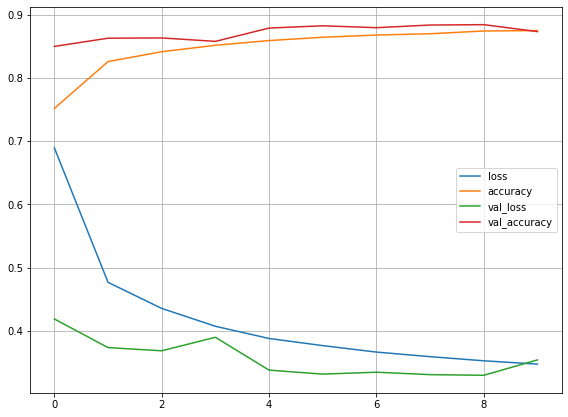

In [16]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.tight_layout()
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.savefig('NeuralNetwork_1.png', dpi=200)


In [17]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
a=np.squeeze(np.argmax(y_test, axis=1))

In [20]:
import seaborn as sns
predictions = model.predict(X_test)
predictions = tf.argmax(predictions, axis=-1)
cm = tf.math.confusion_matrix(a, predictions)
cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

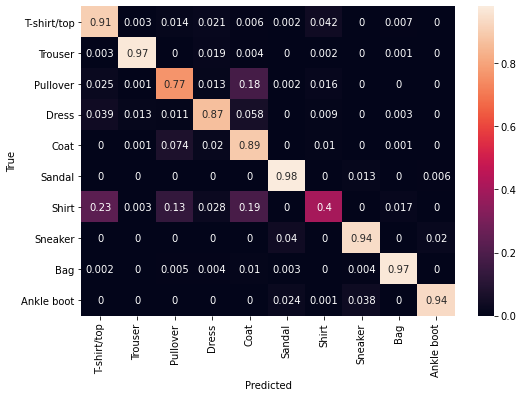

In [25]:
sns.heatmap(
    cm, annot = True,
    xticklabels=labels,
    yticklabels=labels)
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('True')
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.savefig("NeuralNetwork_2.png", dpi = 900)